<a href="https://colab.research.google.com/github/Mahsabeigi33/predict_price/blob/main/mahsa_beigi_sesion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt


In [30]:
# Dataset Generating
#df=pd.read_csv('ETH_USD.csv')
#print(df)
#data= pd.read_csv('stock_data.csv'()
data = pdr.get_data_yahoo('ETH-USD', start='2013-01-01', end='2023-05-17')
print(data)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2023-05-12  1795.176636  1812.424927  1742.403809  1808.019775  1808.019775   
2023-05-13  1808.375000  1816.058472  1788.475586  1796.114868  1796.114868   
2023-05-14  1796.107910  1823.490723  1793.228760  1800.500977  1800.500977   
2023-05-15  1800.371216  1845.695435  1787.536377  1817.549927

In [31]:
df=data
df.shape

(2015, 6)

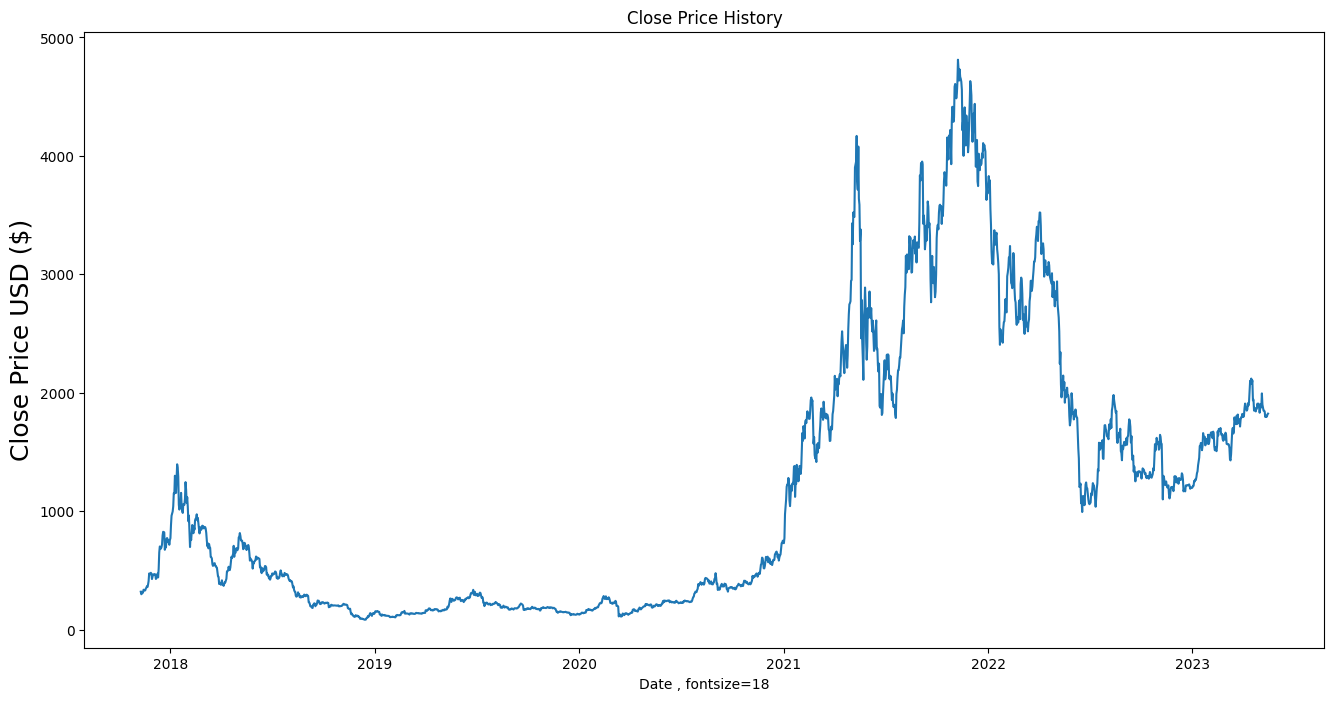

In [53]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date , fontsize=18')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [34]:
# creat the 'Close Cloumn'
data=df.filter(['Close'])
print(data)
# convert to numpy
dataset=data.values
print(dataset.shape)
# the number of rows to be trained
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

                  Close
Date                   
2017-11-09   320.884003
2017-11-10   299.252991
2017-11-11   314.681000
2017-11-12   307.907990
2017-11-13   316.716003
...                 ...
2023-05-12  1808.019775
2023-05-13  1796.114868
2023-05-14  1800.500977
2023-05-15  1817.549927
2023-05-16  1824.121460

[2015 rows x 1 columns]
(2015, 1)


1612

In [35]:
# scale the data
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)

print(scaled_data.shape)

(2015, 1)


# ready data & create LSTM algorithm

In [36]:
# creat scaled data for training

train_data=scaled_data[0:training_data_len,:]

# split data to x_train , x_test
x_train=[]
y_train=[]

for i in range(100,len(train_data)):
  x_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0])
  


In [37]:
#convert  the x_train , y_train to numpy arrays

x_train,y_train=np.array(x_train),np.array(y_train)

In [38]:
#Reshape the data

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape



(1512, 100, 1)

In [39]:
#Build the LSTM model

model=Sequential()
model.add(LSTM(60, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [40]:
# Compile the Model 
model.compile(optimizer='adam',loss='mean_squared_error')


In [41]:
# Train the Model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1512/1512 [==============================] - 86s 53ms/step - loss: 0.0027


## ***validation data 3***

In [42]:
# Creating the testing dataset

test_data=scaled_data[training_data_len-100:,:]
print(len(test_data))
x_test=[] 
y_test=dataset[training_data_len:,:]
print(len(test_data))
for i in range(100,len(test_data)):
  x_test.append(test_data[i-100:i,0])
  


503
503


In [43]:
#convert x_test to numpy arrays
x_test=np.array(x_test)


In [44]:
# Reshape x_test

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [45]:
# Prediction
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)


13/13 [==============================] - 1s 32ms/step


In [46]:
# The root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

139.98350036469643

<ipython-input-47-d12559d3252a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


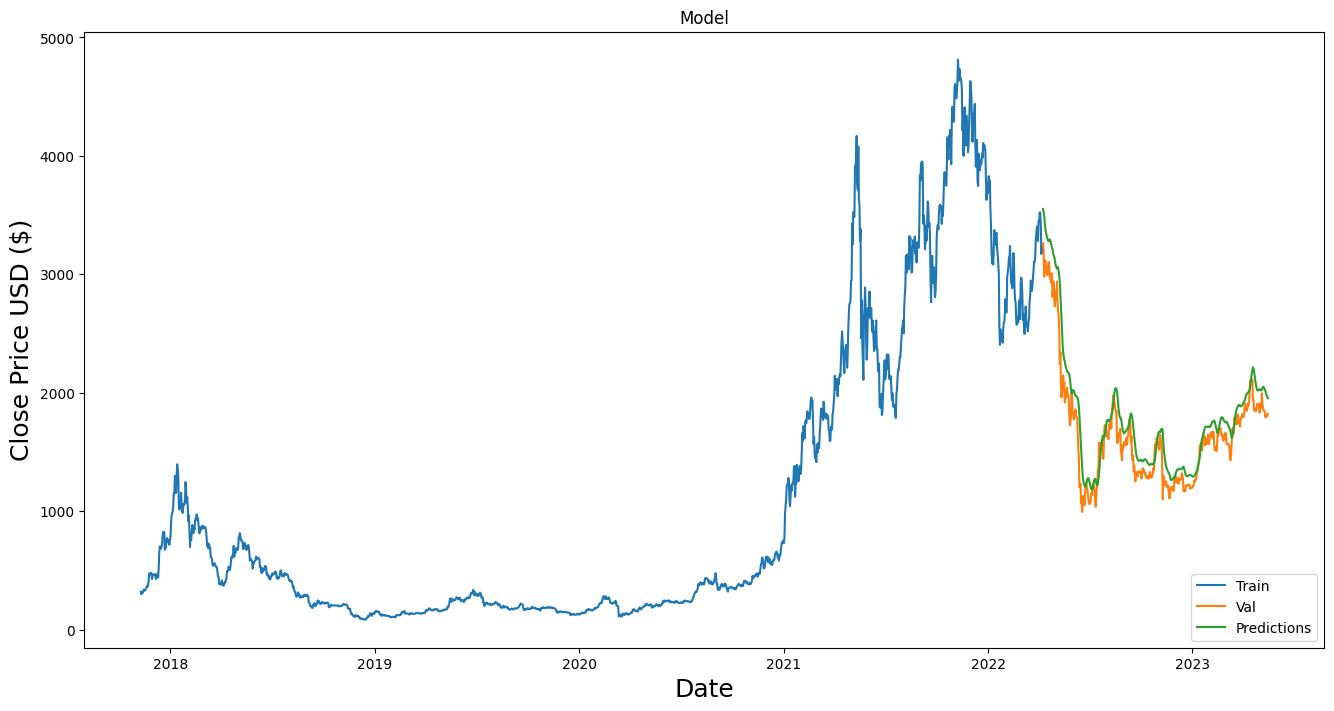

In [47]:
#Plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()





In [48]:
# Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2022-04-09,3261.916260,3552.424805
2022-04-10,3211.866943,3523.454590
2022-04-11,2981.052246,3498.308838
2022-04-12,3030.376465,3441.366699
2022-04-13,3118.344238,3389.681152
...,...,...
2023-05-12,1808.019775,2001.222168
2023-05-13,1796.114868,1985.792114
2023-05-14,1800.500977,1971.516357


In [49]:
eth = pdr.get_data_yahoo('ETH-USD', start='2013-12-17', end='2023-05-19')

# Create a new data frame
new_df=eth.filter(['Close'])


# Get the last 100 day Closing price values and convert the dataframe to an array

last_100_days=new_df[-100:].values


# Scale the data to be values between 0 and 1

last_100_days_scaled=scalar.transform(last_100_days)
  
# Create an empty list

X_test=[]

X_test.append(last_100_days_scaled)

# Convert the numpy array

X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

# Get the predicted scalar price
pred_price=scalar.inverse_transform(pred_price)
print(pred_price)



[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 38ms/step
[[1953.3376]]


In [52]:
usd_eth_2= pdr.get_data_yahoo('ETH-USD', start='2013-12-17', end='2023-05-22')
print(usd_eth_2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2017-11-09     320.884003
2017-11-10     299.252991
2017-11-11     314.681000
2017-11-12     307.907990
2017-11-13     316.716003
                 ...     
2023-05-16    1824.121460
2023-05-17    1821.859619
2023-05-18    1801.728516
2023-05-19    1812.589478
2023-05-20    1816.620605
Name: Close, Length: 2019, dtype: float64
